### PyTorch Custom Datasets

Getting our own data into PyTorch

In [355]:
# Importing dependencies and device agnostic code
import torch
from torch import nn

torch.__version__

'2.7.0+cu126'

In [356]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [357]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [358]:
# FoodVision Mini
'''
Our dataset is a subset of the Food101 dataset.

Our datasest starts with 3 classes of food and only 75 training / 25 testing images.
'''
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("Datasets")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f'{image_path} already exists!')
else:
    print(f'{image_path} doesn`t exist creating one')
    image_path.mkdir(parents=True, exist_ok=True)

# Downloading
with open(data_path / 'pizza_steak_sushi.zip', "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading food imaged data!")
    f.write(request.content)

# Unzipping
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data!")
    zip_ref.extractall(image_path)

Datasets/pizza_steak_sushi already exists!
Unzipping pizza, steak and sushi data!


## Data Preparation and Exploration

In [359]:
import os
def walk_through_dir(dir_path):
    """ 
    Walks through dir_path returning its contents
    """

    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [360]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'Datasets/pizza_steak_sushi'
There are 3 directories and 0 images in 'Datasets/pizza_steak_sushi/train'
There are 0 directories and 75 images in 'Datasets/pizza_steak_sushi/train/steak'
There are 0 directories and 72 images in 'Datasets/pizza_steak_sushi/train/sushi'
There are 0 directories and 78 images in 'Datasets/pizza_steak_sushi/train/pizza'
There are 3 directories and 0 images in 'Datasets/pizza_steak_sushi/test'
There are 0 directories and 19 images in 'Datasets/pizza_steak_sushi/test/steak'
There are 0 directories and 31 images in 'Datasets/pizza_steak_sushi/test/sushi'
There are 0 directories and 25 images in 'Datasets/pizza_steak_sushi/test/pizza'


In [361]:
# Setup training and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir # Built for prebuilt data loading in pytorch

(PosixPath('Datasets/pizza_steak_sushi/train'),
 PosixPath('Datasets/pizza_steak_sushi/test'))

### Visualizing an imge

1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class using `pathlib.Path.parent.stem`
4. Opening images with Python's PIL (Python Imaging Library)
5. Show image and print metadata

In [362]:
# Visualizing a random image
import random
from PIL import Image

torch.manual_seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg")) # Lists all images with .jpg extensions

image_path_list

[PosixPath('Datasets/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/239025.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/461689.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3727491.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2603058.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1382427.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/922752.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/914570.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3074367.jpg'),
 PosixPath('Da

Datasets/pizza_steak_sushi/train/steak/2013535.jpg
Random Image Path: Datasets/pizza_steak_sushi/train/steak/2013535.jpg
Image Class: steak
Image Height: 512
Image Width: 512


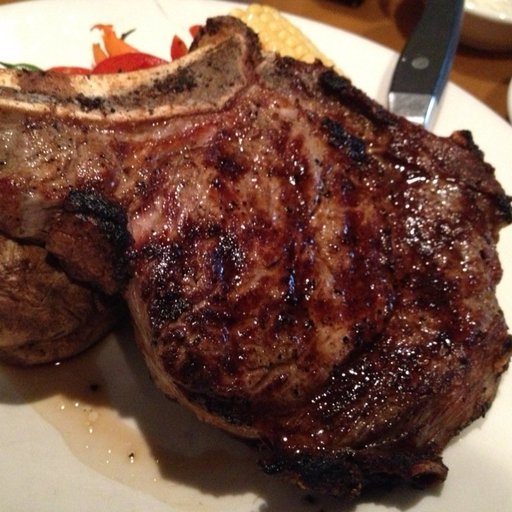

In [363]:
torch.manual_seed(42)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class
image_class = random_image_path.parent.stem
image_class

# 4. Open image
img = Image.open(random_image_path)

# 5. Print Metadata
print(f"Random Image Path: {random_image_path}")
print(f"Image Class: {image_class}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

Text(0.5, 1.0, 'Image Class: steak | Image Shape: (512, 512, 3): [ht, wt, color_channels]')

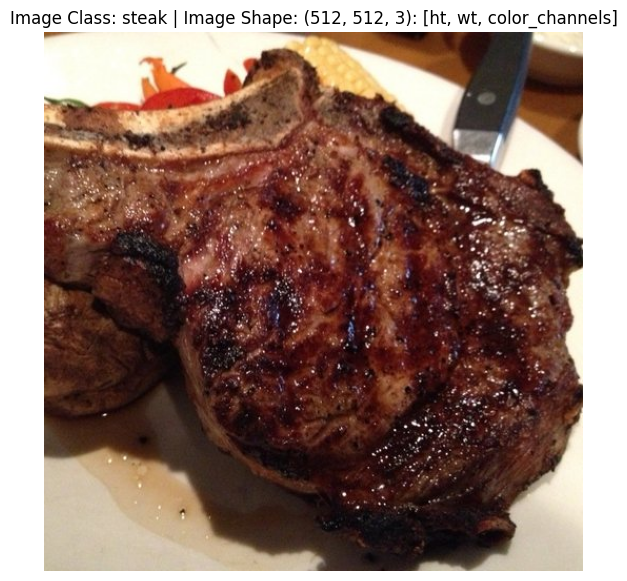

In [364]:
# Visualize using matplotlib
import numpy as np 
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.axis('off')
plt.title(f"Image Class: {image_class} | Image Shape: {img_as_array.shape}: [ht, wt, color_channels]")

In [365]:
img_as_array

array([[[151,  90,  33],
        [150,  89,  32],
        [148,  89,  31],
        ...,
        [233, 220, 188],
        [233, 219, 190],
        [233, 219, 190]],

       [[150,  93,  38],
        [148,  91,  36],
        [146,  91,  35],
        ...,
        [236, 223, 191],
        [235, 221, 192],
        [233, 219, 190]],

       [[143,  96,  44],
        [143,  96,  44],
        [143,  95,  46],
        ...,
        [241, 226, 195],
        [238, 223, 194],
        [234, 219, 190]],

       ...,

       [[198, 189, 160],
        [201, 192, 163],
        [202, 193, 164],
        ...,
        [209, 201, 178],
        [210, 202, 179],
        [211, 203, 180]],

       [[200, 191, 162],
        [201, 192, 163],
        [199, 190, 161],
        ...,
        [208, 200, 177],
        [209, 201, 178],
        [211, 203, 180]],

       [[201, 192, 163],
        [200, 191, 162],
        [196, 187, 158],
        ...,
        [206, 198, 175],
        [207, 199, 176],
        [208, 200, 177]]

In [366]:
# Converting all images to tensors then datasets then dataloader
# Transform parameter

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [367]:
data_transform(img)

tensor([[[0.7569, 0.8314, 0.8980,  ..., 0.9804, 0.9686, 0.9412],
         [0.9804, 0.9882, 0.9922,  ..., 0.9255, 0.9529, 0.9451],
         [0.9961, 0.9961, 0.9922,  ..., 0.5686, 0.6784, 0.7451],
         ...,
         [0.8000, 0.8039, 0.8039,  ..., 0.8314, 0.8353, 0.8431],
         [0.7882, 0.7922, 0.7961,  ..., 0.8196, 0.8235, 0.8275],
         [0.7804, 0.7804, 0.7843,  ..., 0.8157, 0.8196, 0.8235]],

        [[0.6431, 0.7373, 0.8431,  ..., 0.9333, 0.9137, 0.8863],
         [0.9647, 0.9804, 0.9843,  ..., 0.8706, 0.9098, 0.9020],
         [0.9961, 0.9961, 0.9961,  ..., 0.4588, 0.5961, 0.6745],
         ...,
         [0.7529, 0.7569, 0.7569,  ..., 0.7804, 0.7882, 0.8000],
         [0.7490, 0.7490, 0.7490,  ..., 0.7765, 0.7804, 0.7922],
         [0.7412, 0.7373, 0.7373,  ..., 0.7686, 0.7725, 0.7882]],

        [[0.4980, 0.6235, 0.7490,  ..., 0.7961, 0.7725, 0.7529],
         [0.8824, 0.9059, 0.9098,  ..., 0.7608, 0.7961, 0.7843],
         [0.9569, 0.9529, 0.9373,  ..., 0.3647, 0.5020, 0.

In [368]:
data_transform(img).shape # From HWC to CHW when changed to Tensors

torch.Size([3, 64, 64])

In [369]:
data_transform(img).dtype

torch.float32

'\nSize is reduced so pictures are more pixelated, simpler\n\nEasier processing but might cause some loss in image details\n'

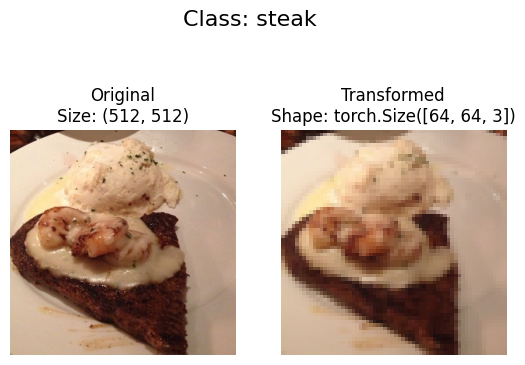

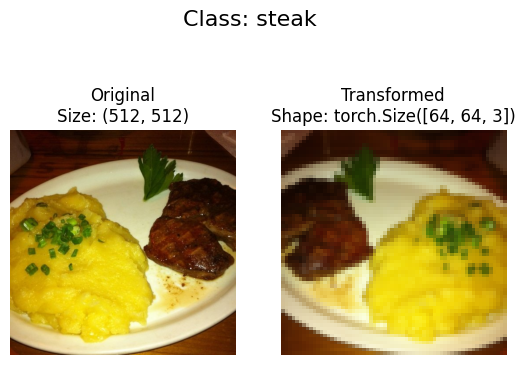

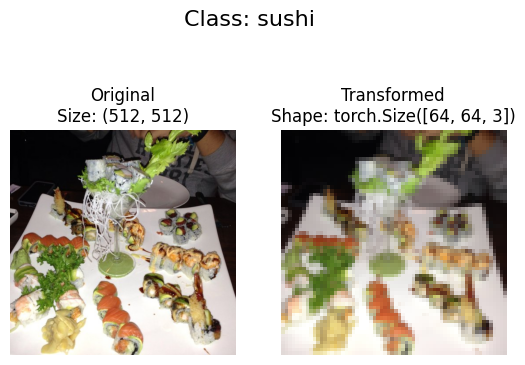

In [370]:
# Visualizing the transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2) 
            # Figure of size (1,2) -> [<Axes0>, <Axes1>], ax is to represent Axes0 and Axes1
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) 
            # Tensor: (C, H, W) but matplotlib requires (H, W, C), so permutation is done
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

"""
Size is reduced so pictures are more pixelated, simpler

Easier processing but might cause some loss in image details
"""

In [371]:
# Option 1: Loading image data using `torchvision.datasets.ImageFolder`
# For cases when data is organized in standard PyTorch format

from torchvision import datasets

# Converts entire image dataset into tensors
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # Transform for data
                                  target_transform=None) # Transform for label/target

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Datasets/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Datasets/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [372]:
# Get class names
class_names = train_data.classes
class_names # A list

['pizza', 'steak', 'sushi']

In [373]:
class_dict = train_data.class_to_idx # Converts to dictionary
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [374]:
len(train_data), len(test_data)

(225, 75)

In [375]:
train_data.targets[0] # First is Pizza

0

In [376]:
train_data.samples[0] # A Pizza as well

('Datasets/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [377]:
# Index on the train_data Dataset to get a sisngle image and label
train_data[0] # [[[Image], Label]] Format

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [378]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [379]:
class_names[label]

'pizza'

In [380]:
# Properties of Image and Label
print(f"Image Tensor: {img}\nImage Shape: {img.shape}\nImage Datatype: {img.dtype}")
print(f"Image Label: {label}\nLabel Class: {class_names[label]}\nLabel Datatype: {type(label)}")

Image Tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [381]:
# Rearrange the dimensions 
img_permute = img.permute(1,2,0)

print(f"Original Shape: {img.shape}: C * H * W")
print(f"Permuted Shape: {img_permute.shape}: H * W * C")    

Original Shape: torch.Size([3, 64, 64]): C * H * W
Permuted Shape: torch.Size([64, 64, 3]): H * W * C


Text(0.5, 1.0, 'pizza')

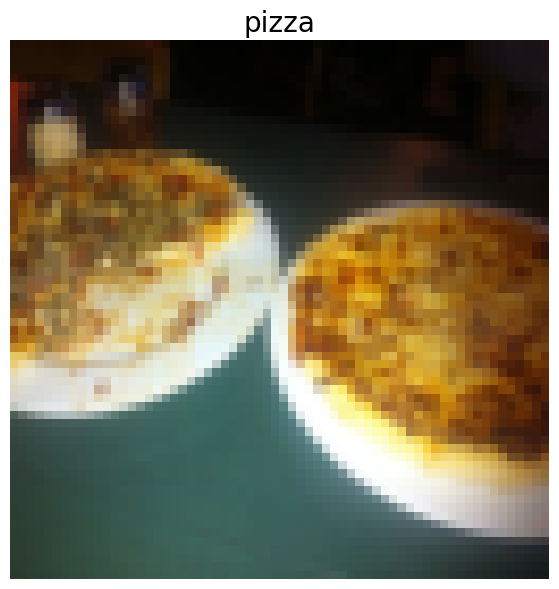

In [382]:
# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=20)

# Pixelated Pizza 64 by 64 Pixels only

In [383]:
# Assigning CPU count for data loading
import os
os.cpu_count()

8

In [384]:
# Creating a Train/Test DataLoader
# DataLoader helps us turn the dataset into iterables of specific batch sizes
# So the model can see the images in batches

from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

len(train_dataloader), len(test_dataloader) # When Batch Size is 1

(8, 3)

In [385]:
# Batch Size 32
len(train_dataloader), len(test_dataloader)

(8, 3)

In [386]:
img, label = next(iter(train_dataloader))
print(f"Image Shape: {img.shape}") # [Batch Size, C, H, W]
print(f"Label Shape: {label.shape}") # [Batch Size]

Image Shape: torch.Size([32, 3, 64, 64])
Label Shape: torch.Size([32])


In [387]:
# Without having ImageFolder function - Loading data with a Custom Dataset

import os
import pathlib
from PIL import Image

from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [388]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [389]:
# Helper Function to get class names
# Use `os.scandir()`, directory in standard image classification format

# Setup a target directory
target_directory = train_dir
print(f"Target Dir: {target_directory}")

# Get the class name from target directory
class_names_found = [entry.name for entry in os.scandir(target_directory)]
class_names_found

Target Dir: Datasets/pizza_steak_sushi/train


['steak', 'sushi', 'pizza']

In [390]:
os.scandir(target_directory), list(os.scandir(target_directory))

(<posix.ScandirIterator at 0x731152ca65d0>,
 [<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>])

In [391]:
# Helper Function 
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]: # Typing Library
    """ Finds the class folder names in a target directory """

    # 1. Get class names by scanning the directory, also checks if entry is directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}!")
    
    # 3. Create dictionary of index labels
    class_to_idx = {class_names: i for i, class_names in enumerate(classes)}
    return classes, class_to_idx # Returns Tuple

find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a custom `Dataset` to replicate the `ImageFolder`

Subclass `torch.utils.data.Dataset`
**Steps:**

1. Init subclass with target directory, transform etc

2. Create several attributes
    - path: Paths to our images
    - transform: The transform to apply
    - classes: A list of target classes
    - class_to_idx: A dict of target classes mapped to labels

3. Create function to `load_images()`, opens an image

4. Overwrite `__len__()` method to return length of our dataset

4. Overwrite `__getitem()__` method to return a given sample when passed an index


In [392]:
# Write custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # 2. Initialize our custom dataset
    def __init__(self, targ_dir: str, transform=None):
        # 3. Create class attributes

        # Get all of the image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # All JPGs

        # Setup transform
        self.transform = transform

        # Class and class_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Create a function to load images
    def load_image(self, index: int) -> Image.Image: # From PIL
        """ Opens an image via a path and returns it """
        image_path = self.paths[index]
        

        """ if self.transform:
            transformed_img = self.transform(Image.open(image_path))
            return plt.imshow(transformed_img.permute(1,2,0)), plt.axis("off") """


        return Image.open(image_path)
    
    # 5. Overwrite __len__()
    def __len__(self) -> int:
        """ Returns total no. of samples """

        return len(self.paths)
    
    # 6. Overwrite __getitem__()
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]: # Img, Label = train_data[0] Format
        """ Returns the sample of data and label (X, y): Tuple Format """

        img = self.load_image(index)
        class_name = self.paths[index].parent.name # Expects path: data_folder/class_name/image.jpg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx
            # Return data, label (X, y)
        else:
            return img, class_idx # Tensor, Labe;
        
    # 7. Viewing Transformed Image
    def transformation(self, index: int) -> Image.Image:
        if not self.transform:
            return f"No transformations possible!"
        
        img = self.load_image(index)
        transformed_img = self.transform(img).permute(1,2,0)

        return plt.imshow(transformed_img), plt.axis("off")

In [393]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

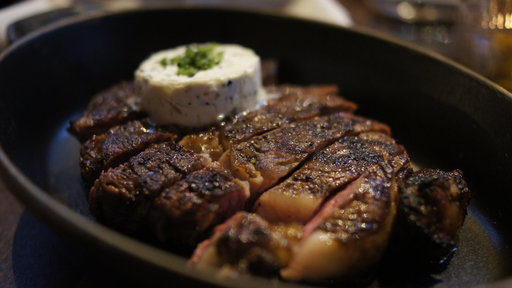

In [394]:
train_data_custom = ImageFolderCustom(targ_dir="Datasets/pizza_steak_sushi/train",
                                      transform=data_transform)

train_data_custom.load_image(index=0)

(<matplotlib.image.AxesImage at 0x73115178be60>,
 (np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5)))

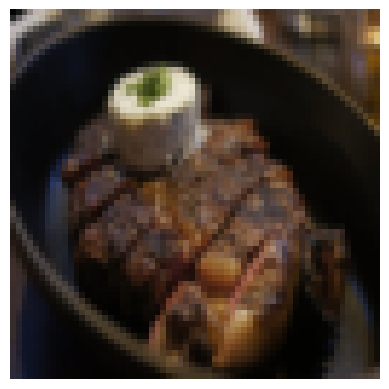

In [395]:
train_data_custom.transformation(index=0)

In [396]:
train_data_custom.__getitem__(0)

(tensor([[[0.0196, 0.0941, 0.3216,  ..., 0.4627, 0.3608, 0.3922],
          [0.1647, 0.4039, 0.6314,  ..., 0.4941, 0.3843, 0.4039],
          [0.5647, 0.6980, 0.7451,  ..., 0.5098, 0.4353, 0.4471],
          ...,
          [0.1843, 0.1490, 0.0667,  ..., 0.1843, 0.1373, 0.1333],
          [0.1765, 0.1490, 0.0706,  ..., 0.2118, 0.2235, 0.2706],
          [0.1804, 0.1608, 0.0784,  ..., 0.2863, 0.3059, 0.3412]],
 
         [[0.0157, 0.0902, 0.2980,  ..., 0.3294, 0.2353, 0.2549],
          [0.1647, 0.3843, 0.6039,  ..., 0.3569, 0.2510, 0.2549],
          [0.5412, 0.6706, 0.7216,  ..., 0.3647, 0.2902, 0.2902],
          ...,
          [0.1647, 0.1412, 0.0863,  ..., 0.1569, 0.1098, 0.1020],
          [0.1608, 0.1412, 0.0902,  ..., 0.1765, 0.1765, 0.2196],
          [0.1608, 0.1529, 0.0980,  ..., 0.2392, 0.2549, 0.2863]],
 
         [[0.0157, 0.0902, 0.2941,  ..., 0.2157, 0.1255, 0.1216],
          [0.1765, 0.3961, 0.6039,  ..., 0.2275, 0.1255, 0.1216],
          [0.5490, 0.6745, 0.7216,  ...,

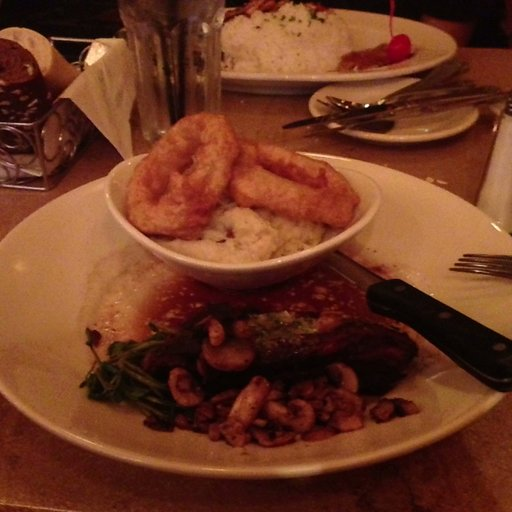

In [397]:
test_data_custom = ImageFolderCustom(targ_dir="Datasets/pizza_steak_sushi/test",
                                     transform=data_transform)

test_data_custom.load_image(index=0)

(<matplotlib.image.AxesImage at 0x731152a80860>,
 (np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5)))

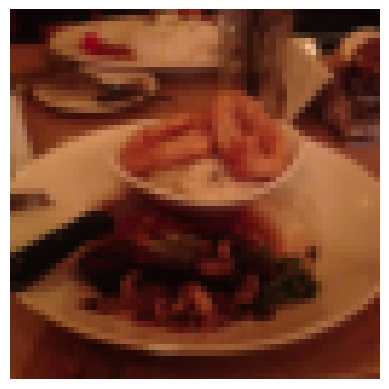

In [398]:
test_data_custom.transformation(index=0)

In [399]:
test_data_custom.__getitem__(0)

(tensor([[[0.0588, 0.0392, 0.0431,  ..., 0.0510, 0.0510, 0.1333],
          [0.0510, 0.0471, 0.0510,  ..., 0.0431, 0.0549, 0.1255],
          [0.0549, 0.0627, 0.0667,  ..., 0.0353, 0.0627, 0.1373],
          ...,
          [0.4588, 0.4392, 0.4392,  ..., 0.3843, 0.4157, 0.4314],
          [0.5137, 0.4863, 0.4824,  ..., 0.3569, 0.4078, 0.4353],
          [0.4235, 0.4314, 0.4510,  ..., 0.3569, 0.4039, 0.4510]],
 
         [[0.0275, 0.0275, 0.0196,  ..., 0.0196, 0.0196, 0.0275],
          [0.0235, 0.0235, 0.0235,  ..., 0.0196, 0.0235, 0.0314],
          [0.0353, 0.0314, 0.0314,  ..., 0.0157, 0.0275, 0.0314],
          ...,
          [0.1922, 0.1765, 0.1725,  ..., 0.1255, 0.1569, 0.1765],
          [0.2549, 0.2235, 0.2157,  ..., 0.0980, 0.1529, 0.1804],
          [0.1647, 0.1686, 0.1882,  ..., 0.0980, 0.1451, 0.1882]],
 
         [[0.0157, 0.0157, 0.0314,  ..., 0.0275, 0.0157, 0.0275],
          [0.0157, 0.0235, 0.0235,  ..., 0.0275, 0.0196, 0.0275],
          [0.0196, 0.0235, 0.0196,  ...,

In [400]:
# Making train and test transforms
train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [401]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7311515db4a0>,
 <__main__.ImageFolderCustom at 0x7311523b3d40>)

In [402]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [403]:
train_data_custom.classes, test_data_custom.classes

(['pizza', 'steak', 'sushi'], ['pizza', 'steak', 'sushi'])

In [404]:
train_data_custom.class_to_idx, test_data_custom.class_to_idx

({'pizza': 0, 'steak': 1, 'sushi': 2}, {'pizza': 0, 'steak': 1, 'sushi': 2})

In [405]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
        # Adjust display if n is too high
        if n > 10:
                n = 10
                display_shape = False
                print(f"The value of n is very high, so turning off display shape!")

        if seed:
                random.seed(seed)
        
        random_samples_idx = random.sample(range(len(dataset)), k=n)

        # Setup up plots
        plt.figure(figsize=(40, 15))

        # Loop through samples and display random samples
        for i, targ_sample in enumerate(random_samples_idx):
                targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

                # Adjust target image for matplotlib
                targ_image_adjust = targ_image.permute(1,2,0)

                # Now plotting the adjusted
                plt.subplot(1, n, i+1)
                plt.imshow(targ_image_adjust)
                plt.axis("off")

                if classes:
                        title = f"Class: {class_names[targ_label]}"
                        if display_shape:
                            title = title + f"\nShape: {targ_image_adjust.shape}"
                            
                plt.title(title,fontsize=10)

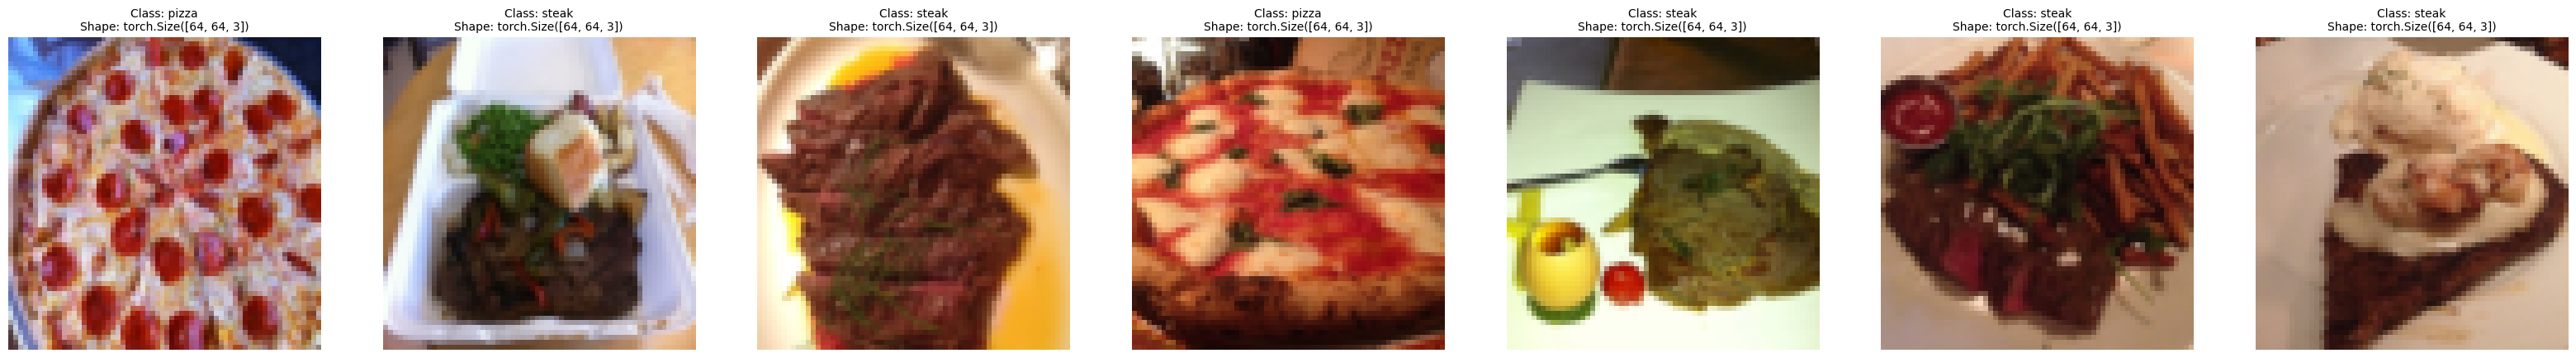

In [406]:
display_random_images(dataset=train_data_custom,
                      classes=class_names,
                      n=7,
                      seed=42)

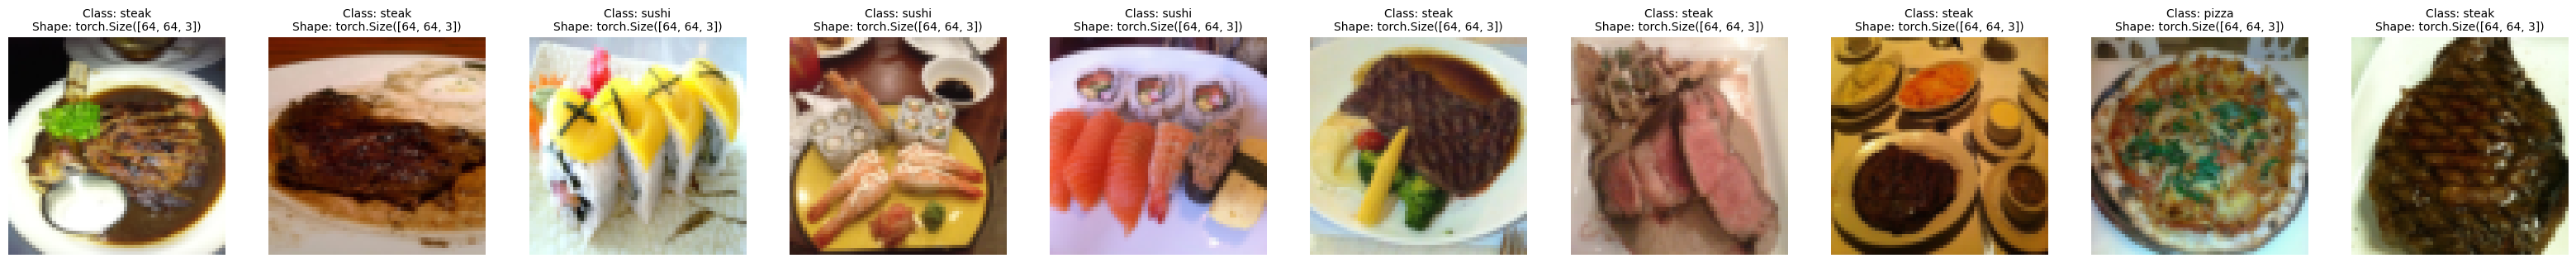

In [407]:
display_random_images(dataset=test_data_custom,
                      classes=class_names,
                      seed=42)

In [408]:
# Creating DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE=32 # Changes length of dataloader
NUM_WORKERS=0

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)# No need to shuffle test data

In [409]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x73115256eba0>,
 <torch.utils.data.dataloader.DataLoader at 0x7311526475f0>)

In [410]:
# Checking the image and label
img_custom, label_custom = next(iter(train_dataloader_custom)) # Single instance of dataloader

In [411]:
img_custom, label_custom

(tensor([[[[0.6275, 0.6667, 0.5294,  ..., 0.8863, 0.8471, 0.8039],
           [0.5059, 0.4706, 0.3333,  ..., 0.5843, 0.5373, 0.4902],
           [0.2941, 0.3059, 0.3216,  ..., 0.4706, 0.4353, 0.4196],
           ...,
           [0.6745, 0.6706, 0.6549,  ..., 0.8510, 0.8824, 0.8510],
           [0.6667, 0.6549, 0.6392,  ..., 0.9020, 0.8157, 0.6392],
           [0.6824, 0.6667, 0.6471,  ..., 0.7922, 0.6078, 0.4549]],
 
          [[0.4235, 0.4549, 0.3294,  ..., 0.5176, 0.4706, 0.4118],
           [0.3333, 0.3020, 0.1961,  ..., 0.2235, 0.1922, 0.1686],
           [0.1373, 0.1451, 0.1529,  ..., 0.1765, 0.1451, 0.1373],
           ...,
           [0.4078, 0.4078, 0.3882,  ..., 0.4157, 0.4902, 0.4745],
           [0.4078, 0.3961, 0.3765,  ..., 0.5137, 0.4353, 0.2745],
           [0.4235, 0.4078, 0.3882,  ..., 0.4314, 0.2510, 0.1608]],
 
          [[0.2196, 0.2392, 0.1804,  ..., 0.0627, 0.0471, 0.0471],
           [0.1647, 0.1451, 0.0980,  ..., 0.0196, 0.0196, 0.0235],
           [0.0275, 0.03

In [412]:
img_custom.shape, label_custom.shape # Image: [batchsize, colorchannels, height, width], Label: [batchsize]

# Larger image size encodes more information

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [413]:
len(train_dataloader_custom), len(test_dataloader_custom) # 225/32, 75/32

(8, 3)

### **Data Augmentation**

Modify data to artificially increase the diversity in training set, which results in better generalization of unseen data

**Some Transforms:**

`transforms.RandAugment()`, `transforms.TrivialAugmentWide()`

These perform better than handpicked transforms

`transforms.TrivialAugmentWide()` has a main parameter `num_magnitude_bins=31`

Defines range of intensity to set a transformation from `0` to `31`

In [414]:
new_train_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # Intensity of Augmentation
    transforms.ToTensor()
])

new_test_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [415]:
# Focusing on Trivial Augment

# Getting image path
image_path

PosixPath('Datasets/pizza_steak_sushi')

In [416]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('Datasets/pizza_steak_sushi/train/steak/2606444.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/239025.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/461689.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3727491.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/2603058.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1849463.jpg'),
 PosixPath('Datasets/pizza_steak_sushi/train/steak/1382427.jpg')]

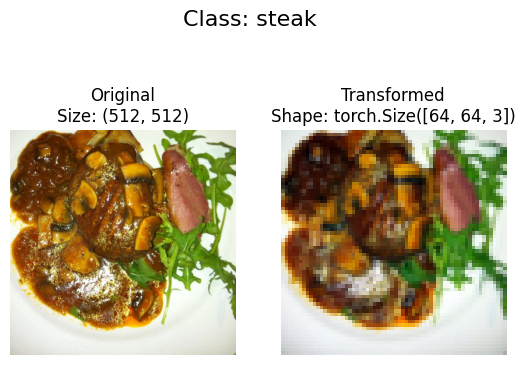

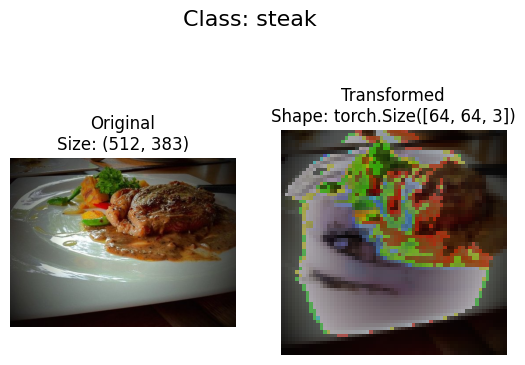

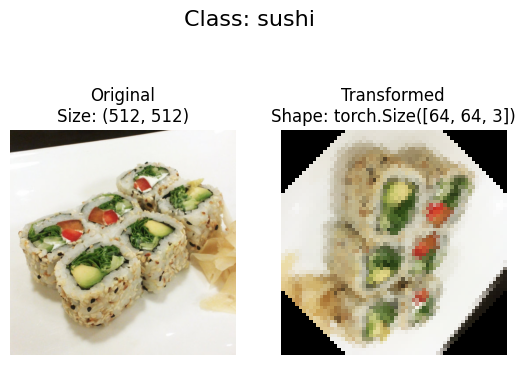

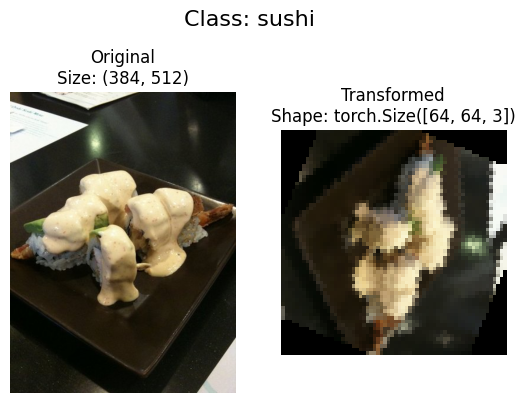

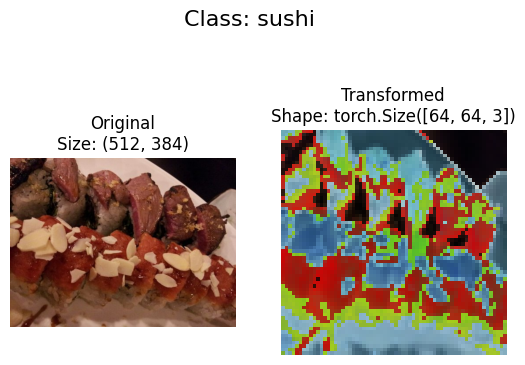

In [417]:
# Plot random transformed images
plot_transformed_images(image_paths=image_path_list,
                        transform=new_train_transforms,
                        n=5,
                        seed=None)

# Randomly applies augmentations based on chosen intensity

In [418]:
# Building a Baseline Model
# Model V0 TinyVGG without Data Augmentation

# Create transforms and loading data
simple_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [419]:
# Load the data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transforms)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transforms)

# Turn datasets into dataloaders
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

In [420]:
# Create TinyVGG Model Class
class TinyVGG(nn.Module):
    """Model architecture copying TinyVGG from CNN explainer"""

    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int) -> None:
        
        super().__init__()

        self.conv_block_one = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # By default stride equals to kernel size
        )

        self.conv_block_two = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      # stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      # stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # By default stride equals to kernel size
        )

        self.classifier = nn.Sequential(
            nn.Flatten(), # Outputs of conv blocks into a feature vector
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_one(x)
        # print(x.shape)
        x = self.conv_block_two(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)

        return x
    
        # return self.classifier(self.conv_block_two(self.conv_block_one(x))) 
        # Benefits from operator fusion -> Operations happen at once, without transportation between memory and compute


In [421]:
class_names

['pizza', 'steak', 'sushi']

In [422]:
train_data.classes

['pizza', 'steak', 'sushi']

In [423]:
torch.manual_seed(42)
ModelV0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

ModelV0

TinyVGG(
  (conv_block_one): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_two): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [424]:
# Passing dummy data to find input shape for classifier layer
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [425]:
ModelV0.eval()
with torch.inference_mode(): # Removes gradient tracking
    image_preds = ModelV0(image_batch.to(device))

# Here, we found required matrix size for classifier layer 1690, we have 10 currently

In [426]:
image_preds, image_preds.shape

(tensor([[0.0578, 0.0634, 0.0351],
         [0.0657, 0.0650, 0.0398],
         [0.0702, 0.0678, 0.0412],
         [0.0687, 0.0646, 0.0417],
         [0.0625, 0.0613, 0.0355],
         [0.0587, 0.0595, 0.0358],
         [0.0634, 0.0637, 0.0376],
         [0.0653, 0.0615, 0.0376],
         [0.0678, 0.0621, 0.0349],
         [0.0620, 0.0599, 0.0371],
         [0.0607, 0.0628, 0.0387],
         [0.0638, 0.0589, 0.0352],
         [0.0658, 0.0611, 0.0369],
         [0.0703, 0.0689, 0.0330],
         [0.0557, 0.0571, 0.0356],
         [0.0632, 0.0642, 0.0388],
         [0.0639, 0.0616, 0.0375],
         [0.0605, 0.0600, 0.0374],
         [0.0623, 0.0627, 0.0368],
         [0.0740, 0.0676, 0.0400],
         [0.0621, 0.0613, 0.0361],
         [0.0632, 0.0599, 0.0366],
         [0.0662, 0.0627, 0.0334],
         [0.0637, 0.0622, 0.0394],
         [0.0670, 0.0666, 0.0363],
         [0.0650, 0.0601, 0.0405],
         [0.0639, 0.0597, 0.0395],
         [0.0733, 0.0687, 0.0412],
         [0.0697, 0.

In [427]:
image_preds_zero = image_preds[0][0]
image_preds_zero

tensor(0.0578)

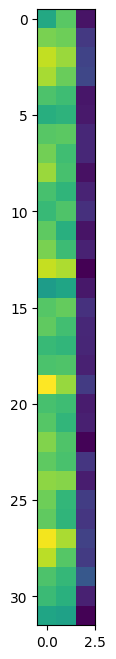

In [428]:
plt.figure(figsize=(16, 8))
plt.imshow(image_preds.cpu().numpy())

In [429]:
# Model Summary using `torchinfo`
from torchinfo import summary

# Runs a forward pass with given parameters
summary(ModelV0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [430]:
# Training the TinyVGG model
# Creating `train_step` and `test_step`

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    
    # Set model in train mode
    model.train()

    # Set up evaluation metrics
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):

        # Move data to device
        X, y = X.to(device), y.to(device)

        # 1. Forward Pass
        y_pred = model(X) # Are logits

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer Zero Grad
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Optimizer Step
        optimizer.step()

        # Calculate accuracy metric 
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

        train_acc += ((y_pred_class==y).sum().item()/len(y_pred))

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)

    return train_loss, train_acc

In [431]:
# Create the test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Set model in evaluation mode
    model.eval()

    # Setup test loss and test accuracy
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # test_pred_labels = test_pred_logits.argmax(dim=1) # Could use Softmax if needed

            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)

            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

        test_loss = test_loss/len(dataloader)
        test_acc = test_acc/len(dataloader)

        return test_loss, test_acc

In [432]:
# Functionize training and testing step

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # Empty dictionary for results
    results = {'train_loss': [],
               'train_acc': [],
               'test_loss': [],
               'test_acc': []
               }
    
    for epoch in tqdm(range(epochs)):

        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
        print(f"Epoch: {epoch + 1} | Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.4f} | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.4f}")

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results 

In [433]:
ModelV0.state_dict()

OrderedDict([('conv_block_one.0.weight',
              tensor([[[[ 0.1471,  0.1597, -0.0451],
                        [ 0.1768, -0.0422,  0.0388],
                        [-0.0937,  0.1130,  0.1697]],
              
                       [[-0.1412,  0.1673,  0.0360],
                        [ 0.1422,  0.0261,  0.0928],
                        [-0.0272,  0.1484,  0.0284]],
              
                       [[-0.0898,  0.0491, -0.0887],
                        [-0.0226, -0.0782,  0.1277],
                        [-0.1519, -0.0887, -0.0543]]],
              
              
                      [[[-0.1157,  0.0182, -0.1901],
                        [ 0.1738, -0.1635,  0.1486],
                        [ 0.0320, -0.0625,  0.1189]],
              
                       [[ 0.0300,  0.1555,  0.0210],
                        [-0.0607,  0.0517, -0.0522],
                        [ 0.0810,  0.1718,  0.1112]],
              
                       [[-0.0841,  0.1111,  0.0344],
               

In [434]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set number of epochs
EPOCHS = 20

# Instance of TinyVGG
ModelV0 = TinyVGG(input_shape=3, 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)

loss_fnV0 = nn.CrossEntropyLoss()

optimizerV0 = torch.optim.Adam(params=ModelV0.parameters(),
                              lr=0.001)

from timeit import default_timer as timer

start_time = timer()

ModelV0_results = train(model=ModelV0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizerV0,
                        loss_fn=loss_fnV0,
                        epochs=EPOCHS)

end_time = timer()

print(f"Total training time: {(end_time-start_time):.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | Train Loss: 1.10784 | Train Accuracy: 0.2578 | Test Loss: 1.13621 | Test Accuracy: 0.2604
Epoch: 2 | Train Loss: 1.08464 | Train Accuracy: 0.4258 | Test Loss: 1.16218 | Test Accuracy: 0.1979
Epoch: 3 | Train Loss: 1.11555 | Train Accuracy: 0.2930 | Test Loss: 1.16983 | Test Accuracy: 0.1979
Epoch: 4 | Train Loss: 1.09754 | Train Accuracy: 0.4141 | Test Loss: 1.13602 | Test Accuracy: 0.1979
Epoch: 5 | Train Loss: 1.09898 | Train Accuracy: 0.2930 | Test Loss: 1.14248 | Test Accuracy: 0.1979
Epoch: 6 | Train Loss: 1.09500 | Train Accuracy: 0.2578 | Test Loss: 1.14707 | Test Accuracy: 0.2604
Epoch: 7 | Train Loss: 1.11920 | Train Accuracy: 0.3047 | Test Loss: 1.14296 | Test Accuracy: 0.3021
Epoch: 8 | Train Loss: 1.10307 | Train Accuracy: 0.3594 | Test Loss: 1.10771 | Test Accuracy: 0.1979
Epoch: 9 | Train Loss: 1.09124 | Train Accuracy: 0.4531 | Test Loss: 1.07518 | Test Accuracy: 0.5417
Epoch: 10 | Train Loss: 1.07178 | Train Accuracy: 0.4023 | Test Loss: 1.02430 | Test Accura

In [435]:
device

'cpu'